<a href="https://colab.research.google.com/github/Anoop-mishra63/DL/blob/main/lLab/DL_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arabic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [ ]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2020-12-08 11:06:46--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 104.27.176.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-08 11:06:46--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [ <=>                ]  28.22M  --.-KB/s    in 0.1s    

2020-12-08 11:06:46 (191 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-08 11:06:46--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 104.27.177.1

In [ ]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [ ]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

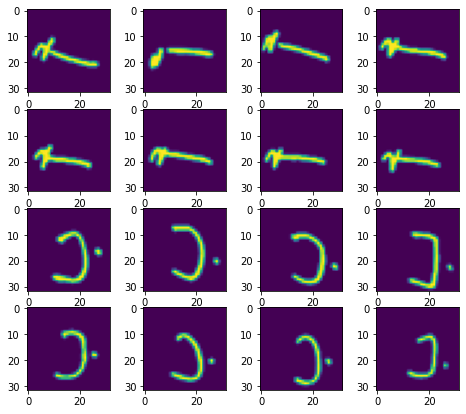

In [ ]:
display_image(train_data, 32, 16)

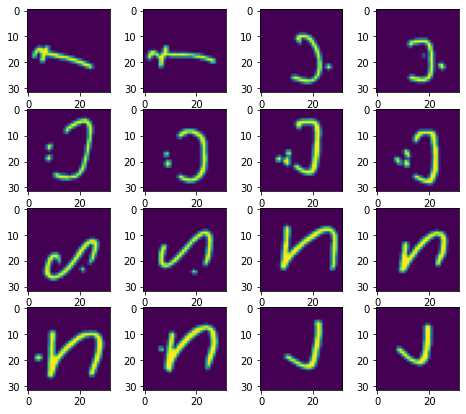

In [ ]:
display_image(test_data, 32, 16)

In [ ]:
train_label = to_categorical(train_label,28)

In [ ]:
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [ ]:
train_data.shape

(13440, 32, 32, 1)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

#CALLBACKS

In [ ]:
#nn.compile(optimizer="adam",
 #          loss='categorical_crossentropy',
  #         metrics = ['accuracy'])
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
recognizer.summary()
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

val_generator = datagen.flow(train_data,subset='validation')
datagen.fit(train_data)

In [ ]:
history = recognizer.fit_generator(datagen.flow(train_data,train_label, batch_size=100), validation_data=val_generator,
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
134/134 - 5s - loss: 2.4755 - accuracy: 0.2418
Epoch 2/30
134/134 - 5s - loss: 1.4414 - accuracy: 0.5160
Epoch 3/30
134/134 - 5s - loss: 1.0353 - accuracy: 0.6448
Epoch 4/30
134/134 - 5s - loss: 0.8108 - accuracy: 0.7269
Epoch 5/30
134/134 - 5s - loss: 0.6647 - accuracy: 0.7755
Epoch 6/30
134/134 - 5s - loss: 0.5579 - accuracy: 0.8136
Epoch 7/30
134/134 - 5s - loss: 0.4812 - accuracy: 0.8376
Epoch 8/30
134/134 - 5s - loss: 0.4127 - accuracy: 0.8644
Epoch 9/30
134/134 - 5s - loss: 0.3690 - accuracy: 0.8792
Epoch 10/30
134/134 - 5s - loss: 0.3334 - accuracy: 0.8909
Epoch 11/30
134/134 - 5s - loss: 0.2926 - accuracy: 0.9066
Epoch 12/30
134/134 - 5s - loss: 0.2728 - accuracy: 0.9123
Epoch 13/30
134/134 - 5s - loss: 0.2595 - accuracy: 0.9158
Epoch 14/30
134/134 - 5s - loss: 0.2260 - accuracy: 0.9291
Epoch 15/30
134/134 - 5s - loss: 0.2158 - accuracy: 0.9313
Epoch 16/30
134/134 - 5s - loss: 0.2081 - accura

In [ ]:
predictions = recognizer.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

In [ ]:
cm = confusion_matrix(test_label, predictions)

In [ ]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9747023809523809


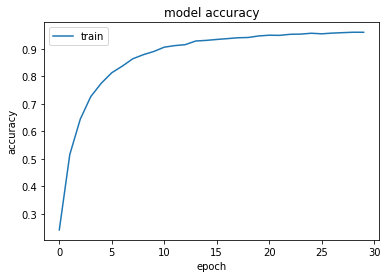

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

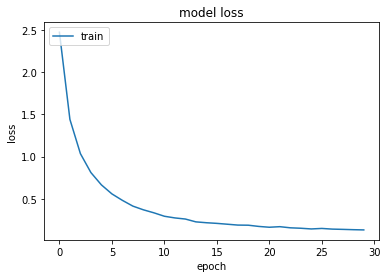

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:

from tensorflow import keras
model = keras.models.load_model('best_model.h5')

In [ ]:
y_test = to_categorical(test_label)

In [ ]:
_, test_acc = saved_model.evaluate(test_data, y_test, verbose=2)
print('Test: %.3f' % ( test_acc))

105/105 - 0s - loss: 2.1429 - accuracy: 0.7774
Test: 0.777


In [ ]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix

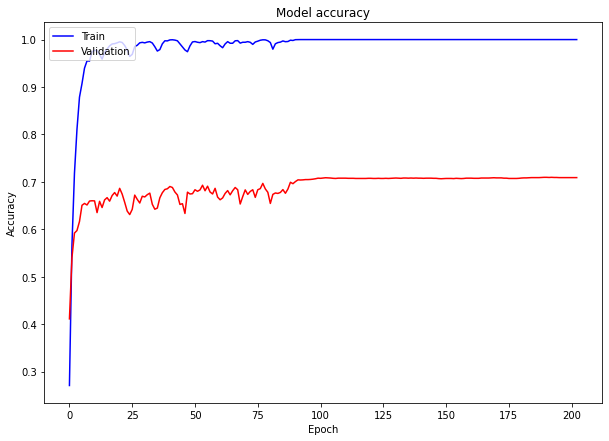

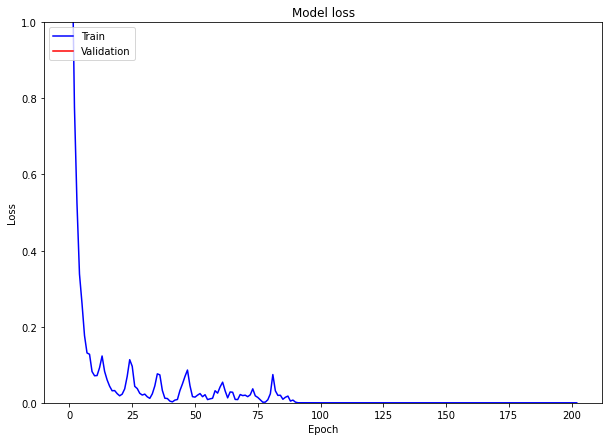

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)
predictions

array([ 0,  0,  1, ..., 26, 27, 27])

#FLOWERS

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-08 11:21:45--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 172.67.193.2, 104.27.177.133, 104.27.176.133, ...
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-08 11:21:46--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [          <=>       ]   5.74M  2.73MB/s    in 2.1s    

2020-12-08 11:21:48 (2.73 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 13/13 [00:00<00:00, 171.46it/s]

13


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 356.39it/s]

39


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

  0%|          | 0/26 [00:00<?, ?it/s]

65


  0%|          | 0/26 [00:00<?, ?it/s]

91


100%|██████████| 26/26 [00:00<00:00, 330.74it/s]

117


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(87, 150, 150, 3) (30, 150, 150, 3) (87, 5) (30, 5)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/20
1/1 [==============================] - 0s 280ms/step - loss: 1.6206 - accuracy: 0.0805 - val_loss: 1.6460 - val_accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 1.5637 - accuracy: 0.2414 - val_loss: 1.5980 - val_accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 51ms/step - loss: 1.5433 - accuracy: 0.3563 - val_loss: 1.6115 - val_accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 0s 67ms/step - loss: 1.5000 - accuracy: 0.2414 - val_loss: 1.4948 - val_accuracy: 0.3667
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 1.4224 - accuracy: 0.3563 - val_loss: 1.4425 - val_accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 51ms/step - loss: 1.3050 - accuracy: 0.5057 - val_loss: 1.4350 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 51ms/step - loss: 1.1385 - accuracy: 0.5057 - val_loss: 1.3669 - val_accuracy: 0.4333
Epoch 8/20
1/1 [==========

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis = 1)

In [ ]:
y_test_ = to_categorical(y_test)

In [ ]:
predictions = to_categorical(predictions,5)
a = np.argmax(predictions ,axis=1)
b = np.argmax(y_test,axis=1)
cm = confusion_matrix(a,b)
cm

array([[0, 0, 0, 0, 0],
       [4, 4, 0, 1, 0],
       [0, 1, 4, 0, 1],
       [1, 2, 1, 5, 0],
       [0, 0, 1, 0, 5]])

In [ ]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("accuracy = " + str(0.9333))

accuracy = 0.9333


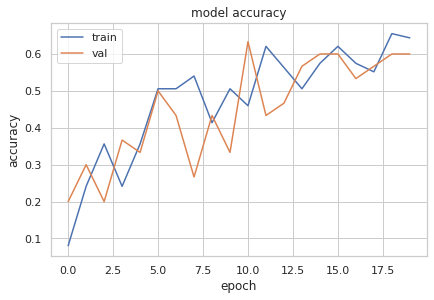

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(y_test, predictions, average="macro"))
print('recall score - ', recall_score(y_test, predictions, average="macro"))

precision score -  0.5
recall score -  0.580952380952381
